### Agrupamento
Analisar o dataset 'cluster' disponibilizado na pasta data, criar um modelo de agrupamento para os dados e avaliar as métricas

#### Importando bibliotecas

In [46]:
### Análise de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Criação do modelo
from sklearn.cluster import KMeans

### Avaliação de métricas
from sklearn.metrics import calinski_harabasz_score, silhouette_score

#### Leitura de dados

In [47]:
data = pd.read_csv("data/cluster.csv")
data.head() # imprimir 5 primeiros registros

,X1,X2
0,9.475315,12.478082
1,7.769381,4.820967
2,10.665292,12.193943
3,4.859041,18.147385
4,4.805134,17.645864


#### Análise exploratória

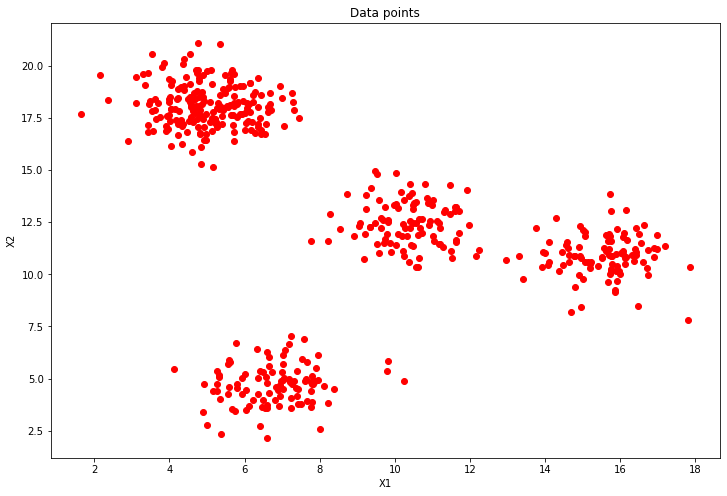

In [48]:
# Plotando pontos
plt.figure(figsize = (12,8))

plt.scatter(x = data['X1'], y = data['X2'], color = "red")
plt.title("Data points")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

#### Definição do modelo e treino

In [49]:
# Todos dados são para treino
# Transformando em array do numpy
X = np.array(data)

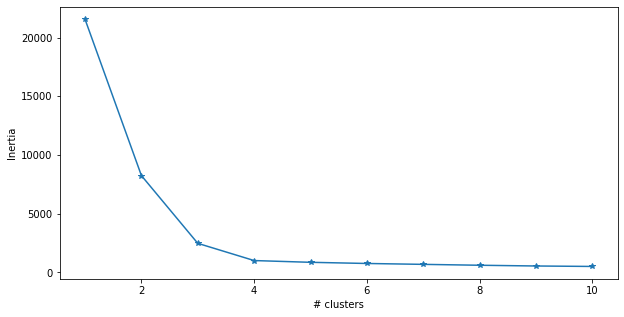

In [50]:
# Definindo um bom número de clusters
# Método do cotovelo (ELBOW METHOD)

distances = []
for i in range(1,11):
    model = KMeans(n_clusters = i)
    model.fit(X)
    distances.append(model.inertia_)

plt.figure(figsize = (10,5))
plt.plot(range(1,11), distances, marker = '*')
plt.xlabel("# clusters")
plt.ylabel("Inertia")
plt.show()

In [58]:
# instanciando modelos
model = KMeans(n_clusters = 4)

# Treinando modelo
model.fit(X)

KMeans(n_clusters=4)

#### Avaliando modelos

In [59]:
# Calinki-Harabasz e Silhouette Score

print(f'Calinski-Harabasz score: {calinski_harabasz_score(X, model.labels_)}')
print(f'Silhouette score: {silhouette_score(X, model.labels_)}')

Calinski-Harabasz score: 3345.107693791305
Silhouette score: 0.7338765282998235


In [60]:
# Printando rótulos
print(model.labels_)

[1 0 1 2 2 2 2 2 3 2 1 2 2 1 1 2 1 2 1 1 2 1 0 0 1 1 2 1 3 3 2 2 0 3 0 2 3
 2 2 3 0 2 1 3 2 1 3 0 2 3 3 0 0 0 3 3 2 2 2 0 1 0 0 0 3 2 1 3 1 3 3 2 2 0
 2 2 2 0 0 0 2 1 3 2 2 3 0 0 0 2 3 3 1 3 3 2 2 1 2 2 3 0 2 2 1 2 2 2 2 2 3
 3 0 2 2 3 2 0 2 3 2 2 0 0 0 2 3 0 1 0 2 2 1 2 0 2 0 2 2 1 3 1 0 2 2 2 0 1
 2 0 1 0 3 0 1 1 0 1 0 3 1 3 2 2 2 2 1 2 3 2 1 0 0 2 0 3 3 1 2 1 2 2 0 3 1
 2 1 3 2 2 1 2 0 2 2 3 0 3 0 0 1 1 2 1 2 2 0 3 3 1 2 2 3 2 0 3 1 3 0 1 3 2
 2 2 3 2 0 2 1 1 3 1 2 2 2 1 2 2 0 0 1 2 2 2 0 2 0 1 2 2 2 3 3 2 3 1 2 2 2
 2 1 1 1 1 2 2 2 0 3 0 2 2 0 2 1 3 3 2 0 3 0 2 1 0 1 2 1 0 2 1 3 0 2 0 2 2
 2 2 0 2 2 3 3 3 1 2 2 2 0 2 3 3 3 2 2 2 2 1 2 0 2 1 2 1 0 2 3 2 0 1 3 1 0
 3 3 3 2 1 2 0 3 3 2 3 2 3 3 0 2 2 2 3 2 1 1 2 3 2 1 0 0 2 2 3 2 2 0 1 2 1
 2 3 2 0 2 1 2 1 2 0 0 1 0 3 2 0 2 0 0 3 2 2 2 2 1 2 2 0 2 1 2 3 3 0 0 2 1
 2 0 2 2 0 0 2 3 3 3 2 2 0 3 3 2 2 2 0 1 3 1 3 2 2 0 2 2 1 1 1 1 2 2 0 2 2
 2 2 3 1 0 2 1 1 2 1 2 0 2 2 3 3 3 2 3 0 2 1 3 1 1 2 3 0 1 2 3 3 1 2 0 1 1
 3 1 2 1 2 3 0 1 2 0 3 0 

#### Analisando clusters

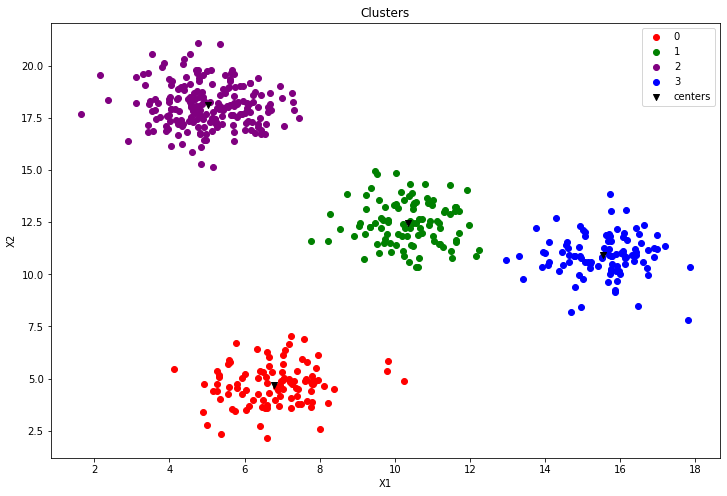

In [61]:
plt.figure(figsize = (12,8))

labels = list(set(model.labels_))
colors = ['red', 'green', 'purple', 'blue']

for i,l in enumerate(labels):
    data_cluster = data.iloc[np.where(model.labels_ == l)[0],:]
    plt.scatter(data_cluster["X1"], data_cluster["X2"], color = colors[i], label = l)
    
plt.scatter(x = model.cluster_centers_[:,0], y = model.cluster_centers_[:,1], marker = 'v', color = 'black', label = "centers")

plt.legend()
plt.title("Clusters")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()